<a href="https://colab.research.google.com/github/aikozhaoz/Stock-Prediction/blob/main/Stock_Prediction_using_ML(Python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation
#              (NIO Inc.) using a 60-day duration stock price().
#              Based on https://randerson112358.medium.com/stock-price-prediction-using-python-machine-learning-e82a039ac2bb.
# See iPad's notes for more visual details

In [2]:
# Import the Libraries we need for this program
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote from yahoo using pandas_datareader
df = web.DataReader('NIO', data_source='yahoo', start='2020-01-03', end='2021-04-30')
# Show the stock quote data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-03,3.900000,3.480000,3.500000,3.830000,82892400,3.830000
2020-01-06,4.240000,3.660000,4.190000,3.680000,106619700,3.680000
2020-01-07,3.730000,3.210000,3.700000,3.240000,106336400,3.240000
2020-01-08,3.490000,3.130000,3.140000,3.390000,65118100,3.390000
2020-01-09,3.580000,3.330000,3.440000,3.460000,54644200,3.460000
...,...,...,...,...,...,...
2021-04-26,43.220001,40.860001,41.959999,42.619999,88233500,42.619999
2021-04-27,43.130001,41.020000,43.020000,41.209999,69998800,41.209999
2021-04-28,41.950001,40.439999,40.740002,41.189999,57639600,41.189999


In [4]:
# Get the number of rows and columns in the data set
df.shape

(334, 6)

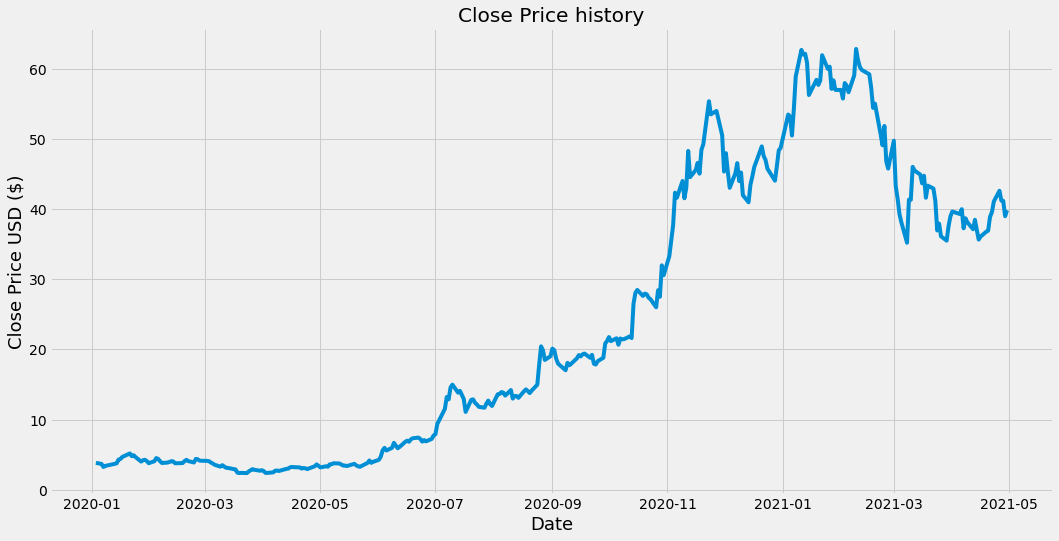

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
print(data)
# Convert the datafram to a numpy array
dataset = data.values
# Get the number of rows to train the model on (80% the dataset we have)
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

                Close
Date                 
2020-01-03   3.830000
2020-01-06   3.680000
2020-01-07   3.240000
2020-01-08   3.390000
2020-01-09   3.460000
...               ...
2021-04-26  42.619999
2021-04-27  41.209999
2021-04-28  41.189999
2021-04-29  38.990002
2021-04-30  39.840000

[334 rows x 1 columns]


268

In [7]:
# Scale the data 
# Build the scaler using MinMaxScaler(set the range from 0 to 1 INCLUSIVE)
scaler = MinMaxScaler(feature_range=(0,1))
# Transform the dataset(numpy array) we got from the dataframe to scaled data
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[2.41442043e-02],
       [2.16636378e-02],
       [1.43873015e-02],
       [1.68678719e-02],
       [1.80254696e-02],
       [1.88523251e-02],
       [2.19943800e-02],
       [2.29866066e-02],
       [3.17512827e-02],
       [3.30742515e-02],
       [3.80353924e-02],
       [4.63039553e-02],
       [4.00198456e-02],
       [4.21696739e-02],
       [3.78700174e-02],
       [2.71208919e-02],
       [3.04283139e-02],
       [3.14205405e-02],
       [2.82784857e-02],
       [2.33173488e-02],
       [2.79477435e-02],
       [3.53894548e-02],
       [3.34049937e-02],
       [2.82784857e-02],
       [2.38134621e-02],
       [2.48056887e-02],
       [2.62940325e-02],
       [2.81131185e-02],
       [2.74516341e-02],
       [2.31519777e-02],
       [2.36480910e-02],
       [2.82784857e-02],
       [3.12551734e-02],
       [2.82784857e-02],
       [2.49710637e-02],
       [3.35703688e-02],
       [3.25781422e-02],
       [2.92707123e-02],
       [2.91053451e-02],
       [2.87746029e-02],


In [8]:
# Create the training data set
# Create the scaled training data set
# train_data is a 2D array
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
# x_train: independent training variable
# y_train: dependent training variable
x_train = []
y_train = []


for i in range(60, len(train_data)):
# First iteration
# x_train: train_data first 60 rows, column 0. [NOT include position i row]
  x_train.append(train_data[i-60:i, 0])
# y_train: train_data the 60th value (append only ONE INDIVIDUAL VALUE each iteration) , column 0.
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print()
    print(y_train)
    print()
    print()
    print()
    

[array([0.0241442 , 0.02166364, 0.0143873 , 0.01686787, 0.01802547,
       0.01885233, 0.02199438, 0.02298661, 0.03175128, 0.03307425,
       0.03803539, 0.04630396, 0.04001985, 0.04216967, 0.03787002,
       0.02712089, 0.03042831, 0.03142054, 0.02827849, 0.02331735,
       0.02794774, 0.03538945, 0.03340499, 0.02827849, 0.02381346,
       0.02480569, 0.02629403, 0.02811312, 0.02745163, 0.02315198,
       0.02364809, 0.02827849, 0.03125517, 0.02827849, 0.02497106,
       0.03357037, 0.03257814, 0.02927071, 0.02910535, 0.0287746 ,
       0.02794774, 0.02480569, 0.02232512, 0.01951381, 0.01521416,
       0.01868695, 0.01571027, 0.01256822, 0.01223747, 0.00942616,
       0.00876468, 0.00099223, 0.00016538, 0.00049612, 0.        ,
       0.00380354, 0.00644948, 0.00926079, 0.00777245, 0.00562263])]

[0.006780222986938547]



[array([0.0241442 , 0.02166364, 0.0143873 , 0.01686787, 0.01802547,
       0.01885233, 0.02199438, 0.02298661, 0.03175128, 0.03307425,
       0.03803539, 0.04630396, 

In [9]:
#Convert the x_train and y_train to numpy arrays so we can use them to treat the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# Reshape the data
# LSTM network expects the input to be 3-dimensional in the form of (# of samples, # of time steps, # of features)
# Right now our x_train dataset is 2-dimensional (rows, columns)
# In our case: # of samples = 208, # of time steps = 60, # of features = 1 (closing price)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(208, 60, 1)

In [38]:
# Build the LSTM model
# Go back and check LSTM model for details
model = Sequential()
# 50 = 50 neurons
# 1 = # of features
# First layer
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# Second layer
model.add(LSTM(50, return_sequences=False))
# Note on Dense Layer:
# A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer. It's the most basic layer in neural networks.
model.add(Dense(25))
# Last layer neuron number = 1: because we are only predicting one closing price in this project
model.add(Dense(1))

In [39]:
# Compile the model
# Optimizer: use to improve upon the loss function
# Loss function: use to measure how well the model did on training
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
# Train the model using x_train dataset and y_train dataset
# fit: train
# batch_size: the total number of training examples present in a single batch
# epochs: number of iterations when an entire dataset is passed forward and backward through a neural network
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

208/208 [==============================] - 7s 21ms/step - loss: 0.0169


In [41]:
# Create the testing data set
# Create a new array containing scaled values from idex 136 to 196
test_data = scaled_data[training_data_len - 60 : , :]
# print(test_data)
# Create the datasets x_test and y_test
x_test = []
# y_test: actual test values
# y_test: all of the values that we want our model to predict (196th and above)
# x_test: past 60 values(Think about samples in STATS), basically the upper 20% data from the dataset
y_test = dataset[training_data_len:, :]
print(len(y_test))
print()
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  if i==(60):
    print(x_test)



66

[array([0.48982966, 0.46651232, 0.51182404, 0.54787498, 0.58442201,
       0.66115427, 0.64924758, 0.6887713 , 0.64792458, 0.67322642,
       0.75955018, 0.69770136, 0.71456924, 0.73127171, 0.70596992,
       0.76203077, 0.77526046, 0.87663306, 0.84570859, 0.84868527,
       0.85381181, 0.79642796, 0.71093105, 0.7542583 , 0.71076564,
       0.67256492, 0.70679677, 0.73077561, 0.68860589, 0.70861586,
       0.65503555, 0.63849842, 0.68017198, 0.69952039, 0.7215148 ,
       0.73342155, 0.77029933, 0.74764349, 0.73821727, 0.71771127,
       0.6894328 , 0.72382999, 0.76087318, 0.76682655, 0.8453779 ,
       0.84058212, 0.79593187, 0.85844218, 0.93517443, 0.99768481,
       0.98677031, 0.98858941, 0.96742184, 0.89135109, 0.92723662,
       0.91516453, 0.92558293, 0.98528197, 0.95286922, 0.95816109])]


In [42]:
# Convert the data(x_test) to a numpy array
x_test = np.array(x_test)
# Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [43]:
# Get the models predicted price values
# After this step the value you get is going to be scaled
predictions = model.predict(x_test)
# Transform the scaled data to actual one
# Think about transform Standard Deviation to actual number
predictions = scaler.inverse_transform(predictions) # Undo scaling

In [44]:
# Calculate the value of root mean squared error (RMSE),
# Which is a good measure of how accurate the model is: the lower the value, the better the model performed, 0 being a perfect match
# Note: prediction is what we predicted, y_test is what the actual value is
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

9.961754024363094

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


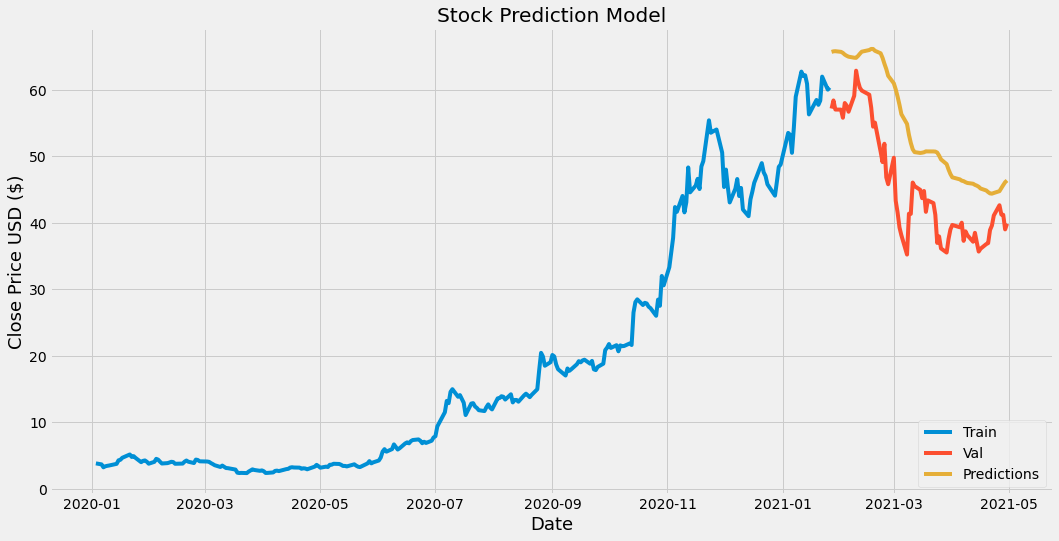

In [45]:
# Plot the data for the graph
# data is the dataframe with only the 'Close' column
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Stock Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
# plt.plot(valid[['Close', 'Predictions']])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [46]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-01-27,57.150002,65.664444
2021-01-28,58.369999,65.747948
2021-01-29,57.000000,65.768837
2021-02-01,56.990002,65.671768
2021-02-02,55.770000,65.511246
...,...,...
2021-04-26,42.619999,44.737762
2021-04-27,41.209999,45.194542
2021-04-28,41.189999,45.651161


In [47]:
# Get the quote
nio_quote = web.DataReader('NIO',
                           data_source='yahoo',
                           start='2020-01-03',
                           end='2021-05-03')
# Create a new dataframe contains the closing price only
new_df = nio_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe into an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
new_x_test = []

# Append the past 60 days to new_x_test. 
new_x_test.append(last_60_days_scaled)
# Convert data set to a numpy array
new_x_test = np.array(new_x_test)

# reshape the data into the shape accepted by the LSTM
new_x_test = np.reshape(new_x_test,
                        (new_x_test.shape[0], new_x_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(new_x_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)



[[46.637714]]


In [48]:
# See what the actual price was
# Get the quote
actual_nio_price = web.DataReader('NIO',
                                  data_source='yahoo',
                                  start='2021-05-03',
                                  end='2021-05-03')
print(actual_nio_price['Close'])

Date
2021-05-03    39.540001
Name: Close, dtype: float64


More resources:

*   https://www.datacamp.com/community/tutorials/lstm-python-stock-market#why
*   https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
*   https://www.thepythoncode.com/article/stock-price-prediction-in-python-using-tensorflow-2-and-keras
*   https://www.analyticsvidhya.com/blog/2020/10/reinforcement-learning-stock-price-prediction/
